<a href="https://colab.research.google.com/github/Ronan-Castro/Modelo-de-Validacao-sobre-Risco-de-Fogo-na-Regiao-de-Altamira/blob/main/eda_queimadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonte dos dados do clima
https://tempo.inmet.gov.br/TabelaEstacoes/A001

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
# configura os gráficos
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

# Dataset de incendios

In [ ]:
df_foco_2_sem_2021 = pd.read_csv("dados/focos_2021-07-01_2021-12-20.csv")
df_foco_1_sem_2021 = pd.read_csv("dados/focos_2021-01-01_2021-06-20.csv")
df_foco_2_sem_2020 = pd.read_csv("dados/focos_2020-07-01_2020-12-20.csv")
df_foco_1_sem_2020 = pd.read_csv("dados/focos_2020-01-01_2020-06-20.csv")
df_foco_2_sem_2019 = pd.read_csv("dados/focos_2019-07-01_2019-12-20.csv")
df_foco_1_sem_2019 = pd.read_csv("dados/focos_2019-01-01_2019-06-20.csv")
df_foco_2_sem_2018 = pd.read_csv("dados/focos_2018-07-01_2018-12-20.csv")

In [ ]:
df_f = pd.concat([df_foco_2_sem_2021, df_foco_1_sem_2021, df_foco_2_sem_2020, df_foco_1_sem_2020, df_foco_2_sem_2019, df_foco_1_sem_2019, df_foco_2_sem_2018])
df_f

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2021/12/04 17:49:00,AQUA_M-T,Brasil,AMAZONAS,FONTE BOA,Amazonia,0.0,9.3,-999.0,-2.51923,-66.09698,7.0
1,2021/12/04 17:49:00,AQUA_M-T,Brasil,AMAZONAS,TEFE,Amazonia,0.0,0.3,0.0,-3.48543,-64.49795,67.6
2,2021/12/01 17:19:00,AQUA_M-T,Brasil,AMAZONAS,NHAMUNDA,Amazonia,1.0,0.4,0.0,-2.21982,-56.82350,142.8
3,2021/12/01 17:19:00,AQUA_M-T,Brasil,AMAZONAS,NHAMUNDA,Amazonia,1.0,0.4,0.0,-2.22115,-56.83280,60.6
4,2021/12/01 17:19:00,AQUA_M-T,Brasil,AMAZONAS,NHAMUNDA,Amazonia,1.0,0.5,0.0,-2.24459,-56.80100,29.2
...,...,...,...,...,...,...,...,...,...,...,...,...
11075,2018/11/05 17:25:00,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,2.0,0.1,0.1,-9.16000,-66.20000,28.1
11076,2018/11/11 16:50:00,AQUA_M-T,Brasil,AMAZONAS,ITACOATIARA,Amazonia,3.0,0.0,0.0,-3.47500,-58.47100,54.6
11077,2018/11/11 16:50:00,AQUA_M-T,Brasil,AMAZONAS,AUTAZES,Amazonia,2.0,0.0,0.1,-3.48600,-59.20900,111.5
11078,2018/11/11 16:50:00,AQUA_M-T,Brasil,AMAZONAS,ITACOATIARA,Amazonia,3.0,0.0,0.0,-3.48900,-58.39300,31.2


In [ ]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55147 entries, 0 to 11079
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datahora      55147 non-null  object 
 1   satelite      55147 non-null  object 
 2   pais          55147 non-null  object 
 3   estado        55147 non-null  object 
 4   municipio     55147 non-null  object 
 5   bioma         55147 non-null  object 
 6   diasemchuva   55143 non-null  float64
 7   precipitacao  55143 non-null  float64
 8   riscofogo     55143 non-null  float64
 9   latitude      55147 non-null  float64
 10  longitude     55147 non-null  float64
 11  frp           54844 non-null  float64
dtypes: float64(6), object(6)
memory usage: 5.5+ MB


In [ ]:
var_num = ["diasemchuva", "precipitacao", "riscofogo", "frp"]
df_f["datahora"] = df_f["datahora"].astype(object)
df_f["latitude"] = df_f["latitude"].astype(object)
df_f["longitude"] = df_f["longitude"].astype(object)

In [ ]:
# altera datahora para exibir somente data
df_f["datahora"] = df_f["datahora"].str[0:10]
df_f

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,2021/12/04,AQUA_M-T,Brasil,AMAZONAS,FONTE BOA,Amazonia,0.0,9.3,-999.0,-2.51923,-66.09698,7.0
1,2021/12/04,AQUA_M-T,Brasil,AMAZONAS,TEFE,Amazonia,0.0,0.3,0.0,-3.48543,-64.49795,67.6
2,2021/12/01,AQUA_M-T,Brasil,AMAZONAS,NHAMUNDA,Amazonia,1.0,0.4,0.0,-2.21982,-56.8235,142.8
3,2021/12/01,AQUA_M-T,Brasil,AMAZONAS,NHAMUNDA,Amazonia,1.0,0.4,0.0,-2.22115,-56.8328,60.6
4,2021/12/01,AQUA_M-T,Brasil,AMAZONAS,NHAMUNDA,Amazonia,1.0,0.5,0.0,-2.24459,-56.801,29.2
...,...,...,...,...,...,...,...,...,...,...,...,...
11075,2018/11/05,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,2.0,0.1,0.1,-9.16,-66.2,28.1
11076,2018/11/11,AQUA_M-T,Brasil,AMAZONAS,ITACOATIARA,Amazonia,3.0,0.0,0.0,-3.475,-58.471,54.6
11077,2018/11/11,AQUA_M-T,Brasil,AMAZONAS,AUTAZES,Amazonia,2.0,0.0,0.1,-3.486,-59.209,111.5
11078,2018/11/11,AQUA_M-T,Brasil,AMAZONAS,ITACOATIARA,Amazonia,3.0,0.0,0.0,-3.489,-58.393,31.2


In [ ]:
# Coloca a data no formato dd/MM/yyyy
#                           dia                       mes                            ano
df_f["datahora"] = df_f["datahora"].str[-2:] + df_f["datahora"].str[-6:-2] + df_f["datahora"].str[0:-6]
df_f.sort_values(by="datahora")

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
19,01/01/2019,AQUA_M-T,Brasil,AMAZONAS,PRESIDENTE FIGUEIREDO,Amazonia,4.0,0.3,0.0,-1.514,-60.173,20.5
18,01/01/2019,AQUA_M-T,Brasil,AMAZONAS,PRESIDENTE FIGUEIREDO,Amazonia,4.0,0.3,0.0,-1.512,-60.162,12.6
284,01/01/2019,AQUA_M-T,Brasil,AMAZONAS,MARAA,Amazonia,3.0,0.3,0.1,-2.002,-65.223,27.9
283,01/01/2019,AQUA_M-T,Brasil,AMAZONAS,PRESIDENTE FIGUEIREDO,Amazonia,4.0,0.3,0.8,-1.912,-60.102,6.5
282,01/01/2019,AQUA_M-T,Brasil,AMAZONAS,PRESIDENTE FIGUEIREDO,Amazonia,4.0,0.4,0.2,-1.839,-60.371,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...
14336,31/10/2021,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,1.0,0.0,0.0,-8.5182,-66.9006,23.5
14337,31/10/2021,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,1.0,0.0,0.0,-8.50884,-66.90192,18.8
14338,31/10/2021,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,1.0,0.0,0.0,-8.50747,-66.89207,6.4
14329,31/10/2021,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,2.0,0.0,0.0,-9.15683,-65.55034,14.5


In [ ]:
# Pega uma unica observacao de cada dia
df_f = df_f.drop_duplicates(subset=["datahora"])
df_f.sort_values(by="datahora")

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
18,01/01/2019,AQUA_M-T,Brasil,AMAZONAS,PRESIDENTE FIGUEIREDO,Amazonia,4.0,0.3,0.0,-1.512,-60.162,12.6
104,01/01/2021,AQUA_M-T,Brasil,AMAZONAS,NHAMUNDA,Amazonia,3.0,0.1,0.1,-2.169,-56.807,11.1
226,01/02/2020,AQUA_M-T,Brasil,AMAZONAS,TAPAUA,Amazonia,0.0,6.2,0.0,-6.279,-62.747,11.3
117,01/03/2019,AQUA_M-T,Brasil,AMAZONAS,PRESIDENTE FIGUEIREDO,Amazonia,7.0,0.0,0.3,-0.965,-60.563,15.1
292,01/04/2019,AQUA_M-T,Brasil,AMAZONAS,BENJAMIN CONSTANT,Amazonia,0.0,10.4,-999.0,-4.384,-70.025,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...
10769,31/08/2020,AQUA_M-T,Brasil,AMAZONAS,NOVO ARIPUANA,Amazonia,3.0,0.0,0.6,-8.177,-61.414,38.2
11221,31/08/2021,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,5.0,10.6,0.0,-9.40379,-66.7478,14.2
10198,31/10/2018,AQUA_M-T,Brasil,AMAZONAS,ITACOATIARA,Amazonia,5.0,0.1,-999.0,-3.16,-58.908,15.0
11628,31/10/2019,AQUA_M-T,Brasil,AMAZONAS,ATALAIA DO NORTE,Amazonia,0.0,2.8,0.0,-4.307,-70.277,4.3


In [ ]:
df_f.isnull().sum()

datahora        0
satelite        0
pais            0
estado          0
municipio       0
bioma           0
diasemchuva     1
precipitacao    1
riscofogo       1
latitude        0
longitude       0
frp             1
dtype: int64

In [ ]:
df_f = df_f.dropna()
df_f.isnull().sum()

datahora        0
satelite        0
pais            0
estado          0
municipio       0
bioma           0
diasemchuva     0
precipitacao    0
riscofogo       0
latitude        0
longitude       0
frp             0
dtype: int64

In [ ]:
df_f

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
0,04/12/2021,AQUA_M-T,Brasil,AMAZONAS,FONTE BOA,Amazonia,0.0,9.3,-999.0,-2.51923,-66.09698,7.0
2,01/12/2021,AQUA_M-T,Brasil,AMAZONAS,NHAMUNDA,Amazonia,1.0,0.4,0.0,-2.21982,-56.8235,142.8
7,02/12/2021,AQUA_M-T,Brasil,AMAZONAS,CANUTAMA,Amazonia,0.0,3.3,0.0,-8.70439,-64.06135,8.5
8,29/11/2021,AQUA_M-T,Brasil,AMAZONAS,BARREIRINHA,Amazonia,2.0,0.4,0.3,-2.8687,-57.45207,14.0
23,28/11/2021,AQUA_M-T,Brasil,AMAZONAS,GUAJARA,Amazonia,3.0,3.7,0.1,-7.40025,-72.50994,42.7
...,...,...,...,...,...,...,...,...,...,...,...,...
10793,10/12/2018,AQUA_M-T,Brasil,AMAZONAS,LABREA,Amazonia,3.0,0.0,0.1,-8.996,-66.01,4.9
10794,12/12/2018,AQUA_M-T,Brasil,AMAZONAS,CANUTAMA,Amazonia,5.0,0.3,0.3,-8.677,-64.282,8.0
10795,16/12/2018,AQUA_M-T,Brasil,AMAZONAS,BOA VISTA DO RAMOS,Amazonia,3.0,0.5,0.0,-3.006,-57.482,7.5
10796,18/12/2018,AQUA_M-T,Brasil,AMAZONAS,MAUES,Amazonia,4.0,0.6,0.0,-3.14,-57.787,7.6


In [ ]:
# Renomeia a coluna datahora para Data
df_f = df_f.rename(columns={"datahora": "Data"})

In [ ]:
# remove as colunas satelite, municipio, estado, latitude e longitude
df_f = df_f.drop(["satelite", "municipio", "estado", "latitude", "longitude"], axis=1)
df_f

,Data,pais,bioma,diasemchuva,precipitacao,riscofogo,frp
0,04/12/2021,Brasil,Amazonia,0.0,9.3,-999.0,7.0
2,01/12/2021,Brasil,Amazonia,1.0,0.4,0.0,142.8
7,02/12/2021,Brasil,Amazonia,0.0,3.3,0.0,8.5
8,29/11/2021,Brasil,Amazonia,2.0,0.4,0.3,14.0
23,28/11/2021,Brasil,Amazonia,3.0,3.7,0.1,42.7
...,...,...,...,...,...,...,...
10793,10/12/2018,Brasil,Amazonia,3.0,0.0,0.1,4.9
10794,12/12/2018,Brasil,Amazonia,5.0,0.3,0.3,8.0
10795,16/12/2018,Brasil,Amazonia,3.0,0.5,0.0,7.5
10796,18/12/2018,Brasil,Amazonia,4.0,0.6,0.0,7.6


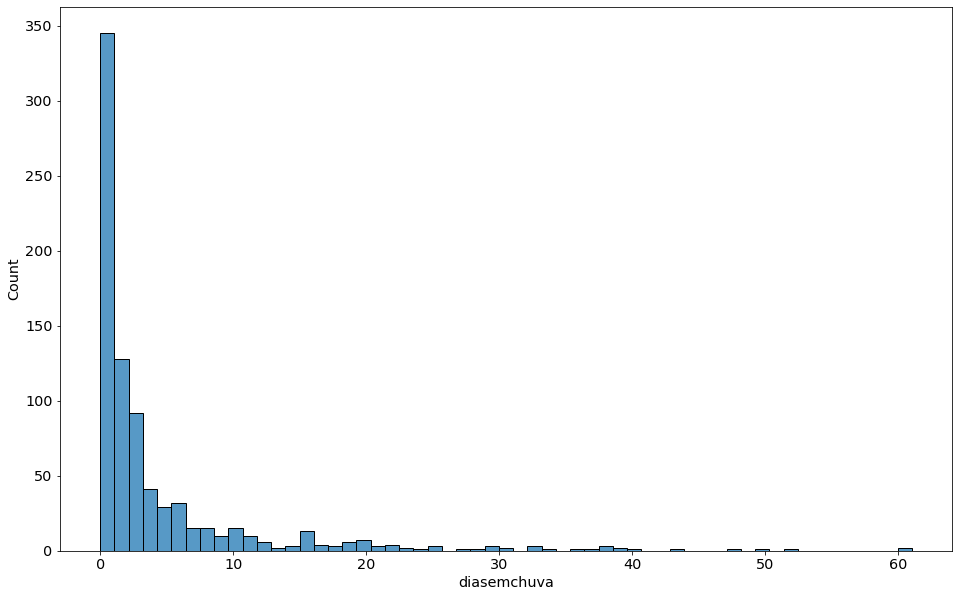

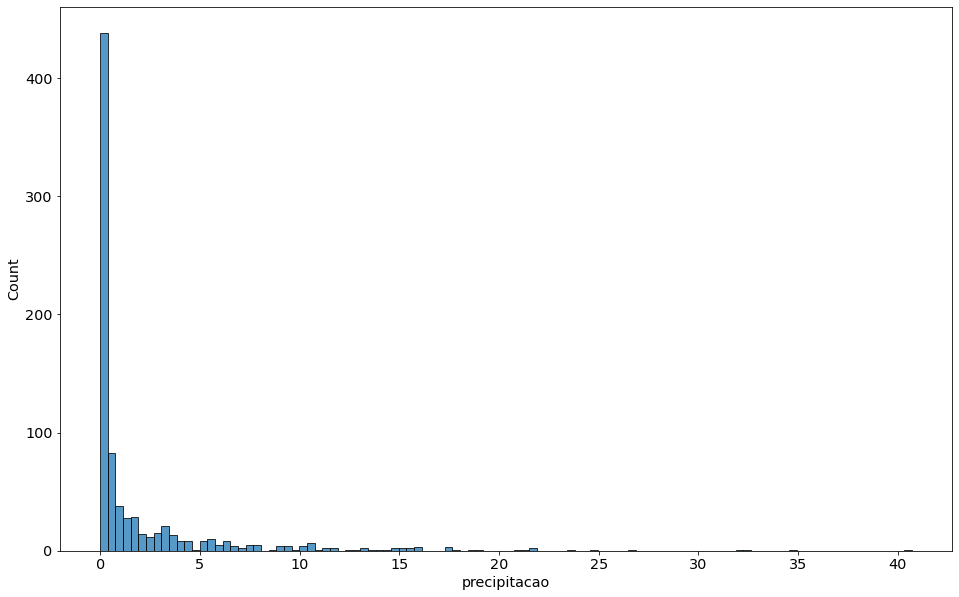

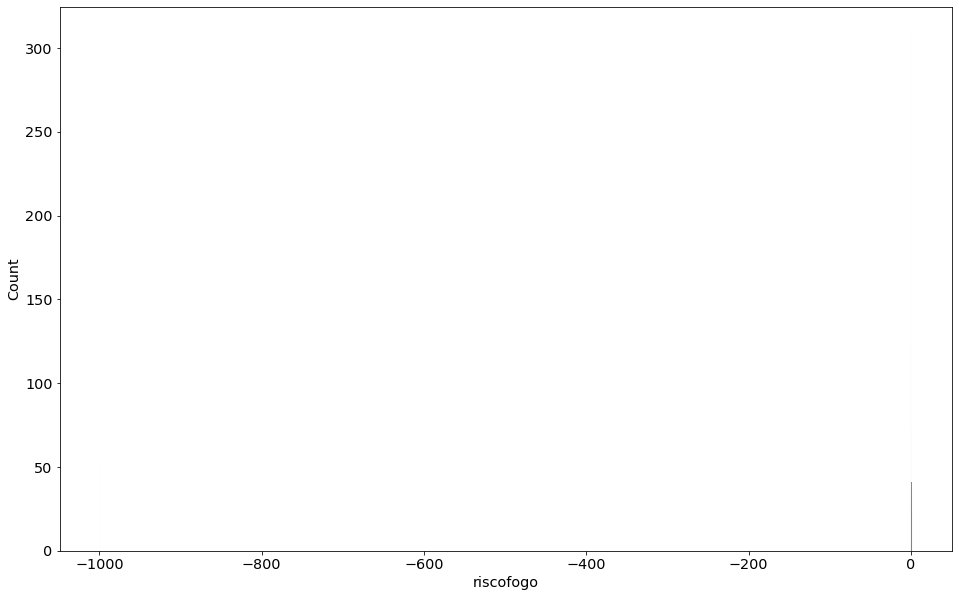

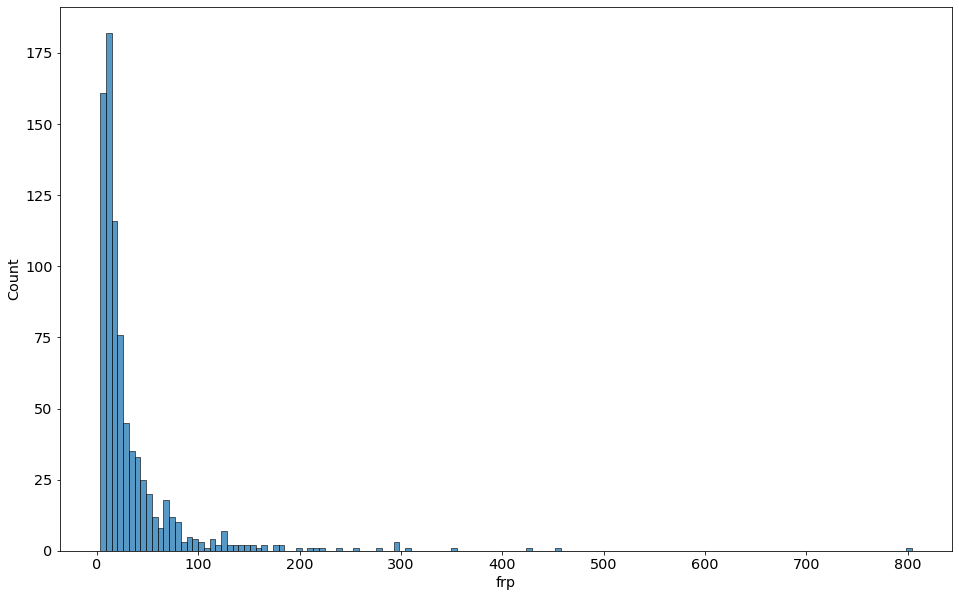

In [ ]:
for var in var_num:
    sns.histplot(df_f[var])
    plt.show()

In [ ]:
# Altera os -999 para a moda
df_f["riscofogo"] = df_f["riscofogo"].replace(-999, df_f["riscofogo"].mode()[0])

# remove os dados com -999
#df_f = df_f[df_f["riscofogo"] != -999]
df_f

,Data,pais,bioma,diasemchuva,precipitacao,riscofogo,frp
0,04/12/2021,Brasil,Amazonia,0.0,9.3,0.0,7.0
2,01/12/2021,Brasil,Amazonia,1.0,0.4,0.0,142.8
7,02/12/2021,Brasil,Amazonia,0.0,3.3,0.0,8.5
8,29/11/2021,Brasil,Amazonia,2.0,0.4,0.3,14.0
23,28/11/2021,Brasil,Amazonia,3.0,3.7,0.1,42.7
...,...,...,...,...,...,...,...
10793,10/12/2018,Brasil,Amazonia,3.0,0.0,0.1,4.9
10794,12/12/2018,Brasil,Amazonia,5.0,0.3,0.3,8.0
10795,16/12/2018,Brasil,Amazonia,3.0,0.5,0.0,7.5
10796,18/12/2018,Brasil,Amazonia,4.0,0.6,0.0,7.6


<AxesSubplot:xlabel='riscofogo', ylabel='Count'>

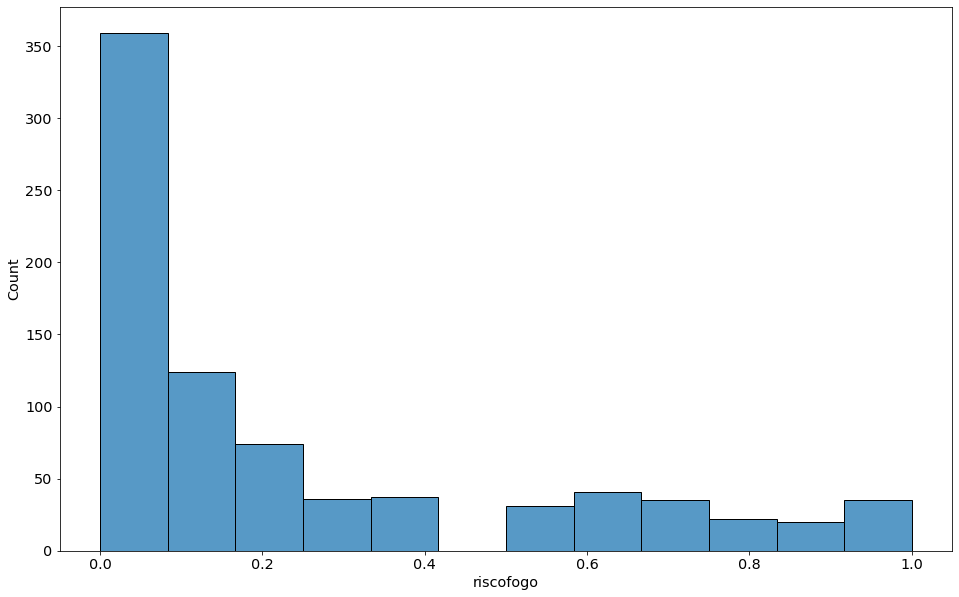

In [ ]:
sns.histplot(df_f["riscofogo"])

<AxesSubplot:>

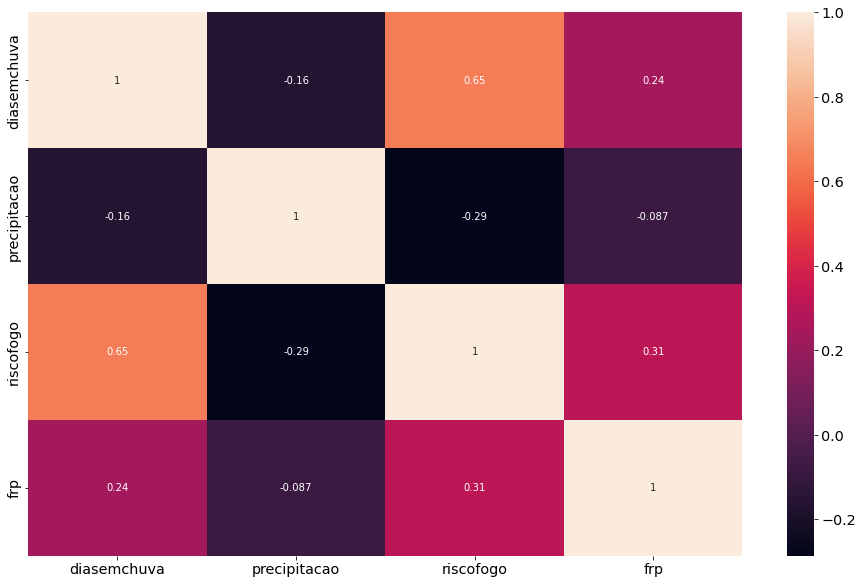

In [ ]:
sns.heatmap(df_f.corr(), annot=True)

# Dataset metereológico

In [ ]:
df_m_2_sem_2021 = pd.read_csv("dados/CODAJAS_82326_2021-07-01_2021-12-20.csv", delimiter=";")
df_m_1_sem_2021 = pd.read_csv("dados/CODAJAS_82326_2021-01-01_2021-06-20.csv", delimiter=";")
df_m_2_sem_2020 = pd.read_csv("dados/CODAJAS_82326_2020-07-01_2020-12-20.csv", delimiter=";")
df_m_1_sem_2020 = pd.read_csv("dados/CODAJAS_82326_2020-01-01_2020-06-20.csv", delimiter=";")
df_m_2_sem_2019 = pd.read_csv("dados/CODAJAS_82326_2019-07-01_2019-12-20.csv", delimiter=";")
df_m_1_sem_2019 = pd.read_csv("dados/CODAJAS_82326_2019-01-01_2019-06-20.csv", delimiter=";")

In [ ]:
df_m = pd.concat([df_m_2_sem_2021, df_m_1_sem_2021, df_m_2_sem_2020, df_m_1_sem_2020, df_m_2_sem_2019, df_m_1_sem_2019])
df_m

,Data,Hora (UTC),Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm)
0,01/07/2021,0,"22,7","84,0",NaN,"3,1","230,0","10,0","0,90","28,8",NaN,NaN
1,01/07/2021,1200,"22,4","84,0",NaN,"3,1","230,0","6,3",NaN,NaN,"20,2","0,0"
2,01/07/2021,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02/07/2021,0,"23,8","93,0",NaN,"2,1","230,0","8,8","0,00","30,4",NaN,NaN
4,02/07/2021,1200,"23,6","86,0",NaN,"2,1","270,0","10,0",NaN,NaN,"22,2","0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...
508,19/06/2019,1200,"25,2","98,0",NaN,"1,0","50,0","8,0",NaN,NaN,"23,7","0,0"
509,19/06/2019,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,20/06/2019,0,"27,8","94,0",NaN,"2,0","140,0","7,0","0,00","29,8",NaN,NaN
511,20/06/2019,1200,"25,0","93,0",NaN,"2,0","50,0","8,0",NaN,NaN,"23,7","9,4"


In [ ]:
# Renomeia as coluna
columns = {
    "Temp. [Hora] (C)": "temperatura",
    "Umi. (%)": "umidade",
    "Vel. Vento (m/s)": "vel_vento",
    "Dir. Vento (m/s)": "dir_vento",
    "Nebulosidade (Decimos)": "nebulosidade",
    "Insolacao (h)": "insolacao",
    "Temp. Max. [Diaria] (h)": "temp_max",
    "Temp. Max. [Diaria] (h)": "temp_max",
}
df_m = df_m.rename(columns=columns)

In [ ]:
# Pega uma unica observacao de cada dia
df_m = df_m.drop_duplicates(subset=["Data"])
df_m

,Data,Hora (UTC),temperatura,umidade,Pressao (hPa),vel_vento,dir_vento,nebulosidade,insolacao,temp_max,Temp. Min. [Diaria] (h),Chuva [Diaria] (mm)
0,01/07/2021,0,"22,7","84,0",NaN,"3,1","230,0","10,0","0,90","28,8",NaN,NaN
3,02/07/2021,0,"23,8","93,0",NaN,"2,1","230,0","8,8","0,00","30,4",NaN,NaN
6,03/07/2021,0,"25,0","92,0",NaN,"2,1","320,0","3,8","0,40","29,6",NaN,NaN
9,04/07/2021,0,"25,0","96,0",NaN,"2,1","360,0","7,5",NaN,NaN,NaN,NaN
12,05/07/2021,0,NaN,NaN,NaN,NaN,NaN,NaN,"0,50","31,6",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
498,16/06/2019,0,"25,8","94,0",NaN,"2,0","50,0","9,0","1,70","33,2",NaN,NaN
501,17/06/2019,0,"28,0","90,0",NaN,"1,0","50,0","4,0","0,00","32,4",NaN,NaN
504,18/06/2019,0,"26,2","94,0",NaN,"1,0","50,0","8,0","1,50","33,0",NaN,NaN
507,19/06/2019,0,"27,6","92,0",NaN,"1,0","90,0","3,0","1,50","33,5",NaN,NaN


In [ ]:
df_m.isnull().sum()

Data                          0
Hora (UTC)                    0
temperatura                 205
umidade                     206
Pressao (hPa)              1033
vel_vento                   205
dir_vento                   205
nebulosidade                205
insolacao                   263
temp_max                    210
Temp. Min. [Diaria] (h)    1033
Chuva [Diaria] (mm)        1033
dtype: int64

In [ ]:
# Remove as colunas Pressao, Temp minima e chuva diaria
df_m = df_m.drop(["Pressao (hPa)", "Temp. Min. [Diaria] (h)", "Chuva [Diaria] (mm)", "Hora (UTC)"], axis=1)
df_m

,Data,temperatura,umidade,vel_vento,dir_vento,nebulosidade,insolacao,temp_max
0,01/07/2021,"22,7","84,0","3,1","230,0","10,0","0,90","28,8"
3,02/07/2021,"23,8","93,0","2,1","230,0","8,8","0,00","30,4"
6,03/07/2021,"25,0","92,0","2,1","320,0","3,8","0,40","29,6"
9,04/07/2021,"25,0","96,0","2,1","360,0","7,5",NaN,NaN
12,05/07/2021,NaN,NaN,NaN,NaN,NaN,"0,50","31,6"
...,...,...,...,...,...,...,...,...
498,16/06/2019,"25,8","94,0","2,0","50,0","9,0","1,70","33,2"
501,17/06/2019,"28,0","90,0","1,0","50,0","4,0","0,00","32,4"
504,18/06/2019,"26,2","94,0","1,0","50,0","8,0","1,50","33,0"
507,19/06/2019,"27,6","92,0","1,0","90,0","3,0","1,50","33,5"


In [ ]:
# Substitui a virgula por ponto nos valores float
df_m["temperatura"] = df_m["temperatura"].str.replace(",", ".").astype(float)
df_m["umidade"] = df_m["umidade"].str.replace(",", ".").astype(float)
df_m["vel_vento"] = df_m["vel_vento"].str.replace(",", ".").astype(float)
df_m["dir_vento"] = df_m["dir_vento"].str.replace(",", ".").astype(float)
df_m["nebulosidade"] = df_m["nebulosidade"].str.replace(",", ".").astype(float)
df_m["insolacao"] = df_m["insolacao"].str.replace(",", ".").astype(float)
df_m["temp_max"] = df_m["temp_max"].str.replace(",", ".").astype(float)

df_m

,Data,temperatura,umidade,vel_vento,dir_vento,nebulosidade,insolacao,temp_max
0,01/07/2021,22.7,84.0,3.1,230.0,10.0,0.9,28.8
3,02/07/2021,23.8,93.0,2.1,230.0,8.8,0.0,30.4
6,03/07/2021,25.0,92.0,2.1,320.0,3.8,0.4,29.6
9,04/07/2021,25.0,96.0,2.1,360.0,7.5,NaN,NaN
12,05/07/2021,NaN,NaN,NaN,NaN,NaN,0.5,31.6
...,...,...,...,...,...,...,...,...
498,16/06/2019,25.8,94.0,2.0,50.0,9.0,1.7,33.2
501,17/06/2019,28.0,90.0,1.0,50.0,4.0,0.0,32.4
504,18/06/2019,26.2,94.0,1.0,50.0,8.0,1.5,33.0
507,19/06/2019,27.6,92.0,1.0,90.0,3.0,1.5,33.5


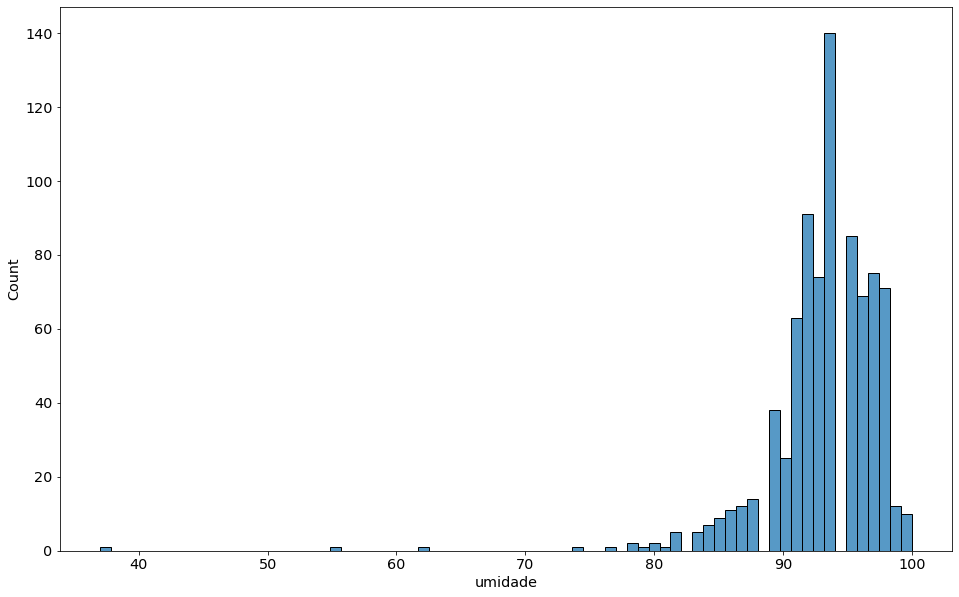

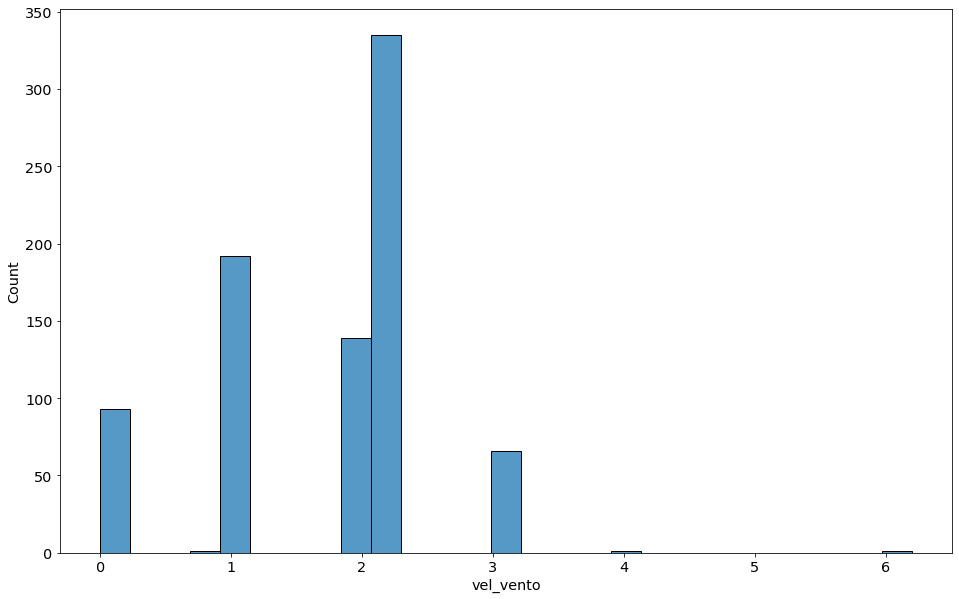

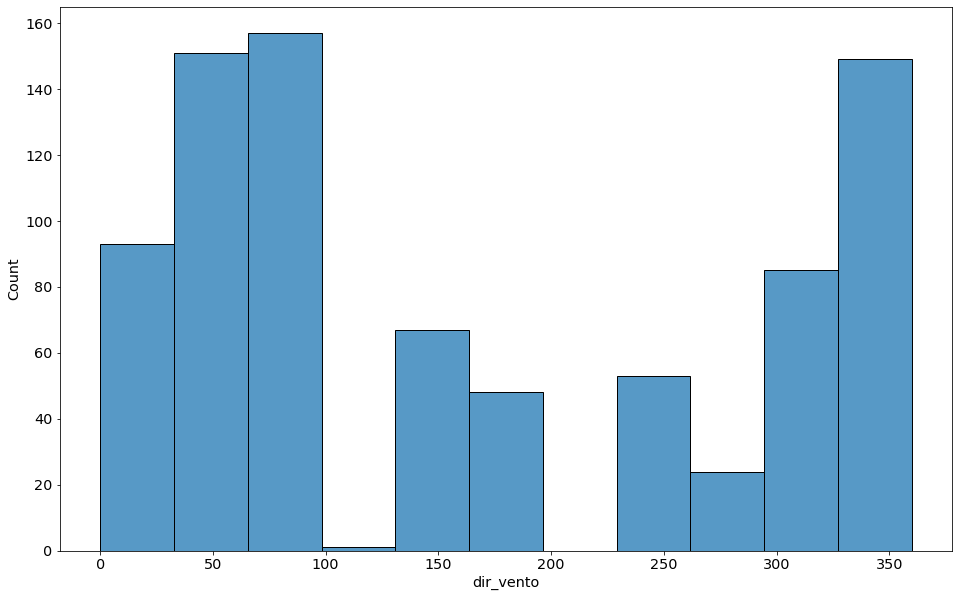

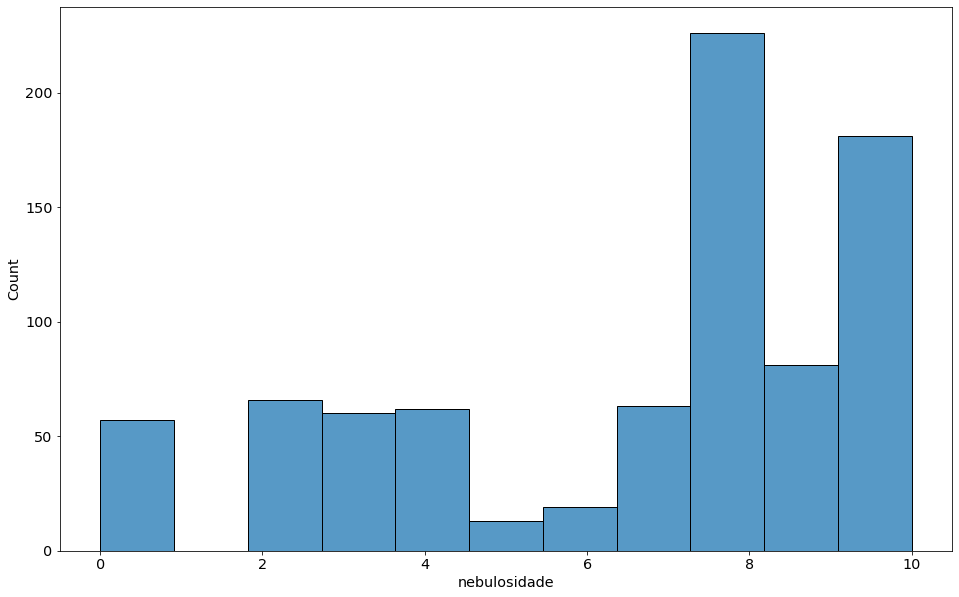

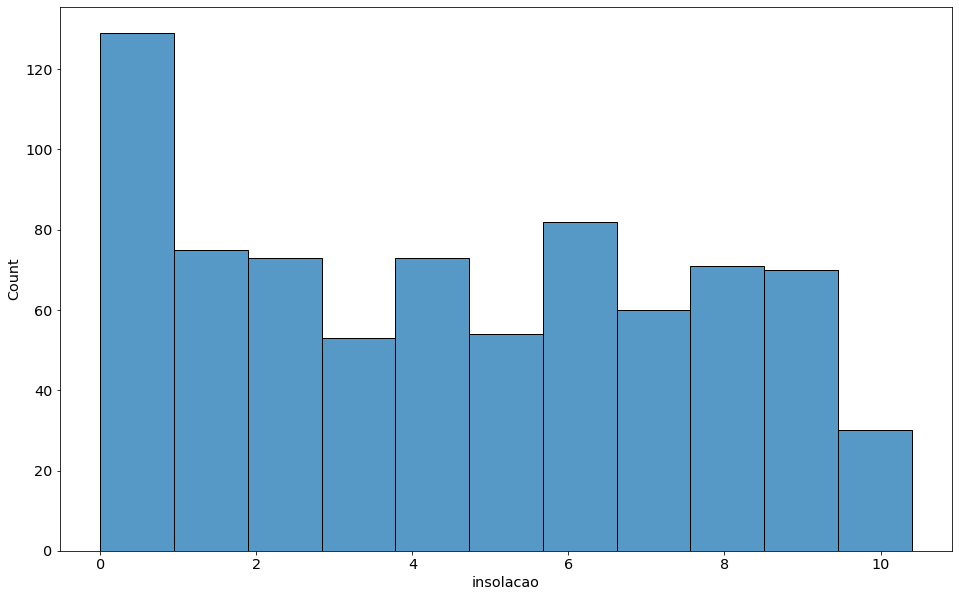

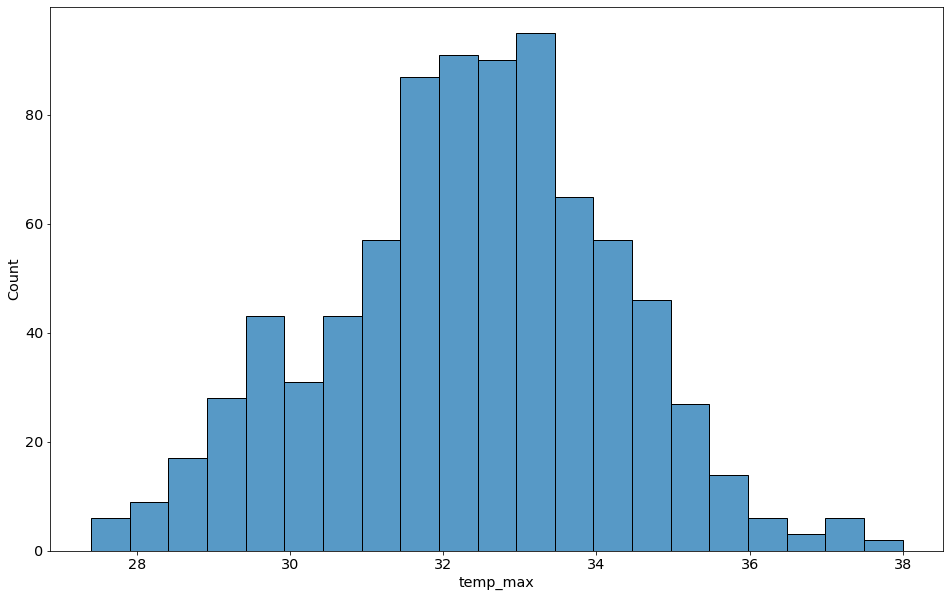

In [ ]:
var_num = df_m.columns[2::]
var_num
for var in var_num:
    sns.histplot(df_m[var])
    plt.show()

In [ ]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 0 to 510
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          1033 non-null   object 
 1   temperatura   828 non-null    float64
 2   umidade       827 non-null    float64
 3   vel_vento     828 non-null    float64
 4   dir_vento     828 non-null    float64
 5   nebulosidade  828 non-null    float64
 6   insolacao     770 non-null    float64
 7   temp_max      823 non-null    float64
dtypes: float64(7), object(1)
memory usage: 72.6+ KB


In [ ]:
def preencher_nulo(coluna, metodo):
    # 1 media
    # 2 moda
    # 3 mediana
    
    if metodo == 1:
        df_m[coluna] = df_m[coluna].fillna(df_m[coluna].mean())
    elif metodo == 2:
        df_m[coluna] = df_m[coluna].fillna(df_m[coluna].mode()[0])
    else:
        df_m[coluna] = df_m[coluna].fillna(df_m[coluna].median())  

In [ ]:
# Transforma a porcentagem em decimal
df_m["umidade"] = df_m["umidade"] / 100
df_m

,Data,temperatura,umidade,vel_vento,dir_vento,nebulosidade,insolacao,temp_max
0,01/07/2021,22.7,0.84,3.1,230.0,10.0,0.9,28.8
3,02/07/2021,23.8,0.93,2.1,230.0,8.8,0.0,30.4
6,03/07/2021,25.0,0.92,2.1,320.0,3.8,0.4,29.6
9,04/07/2021,25.0,0.96,2.1,360.0,7.5,NaN,NaN
12,05/07/2021,NaN,NaN,NaN,NaN,NaN,0.5,31.6
...,...,...,...,...,...,...,...,...
498,16/06/2019,25.8,0.94,2.0,50.0,9.0,1.7,33.2
501,17/06/2019,28.0,0.90,1.0,50.0,4.0,0.0,32.4
504,18/06/2019,26.2,0.94,1.0,50.0,8.0,1.5,33.0
507,19/06/2019,27.6,0.92,1.0,90.0,3.0,1.5,33.5


In [ ]:
# Preenche os valores nulos
# Foi utilizado média por ser uma distribuição normal
preencher_nulo("temperatura", 1)

In [ ]:
# Preenche os valores nulos
# Foi utilizado mediana
preencher_nulo("umidade", 3)

In [ ]:
# Preenche os valores nulos
# Foi utilizado media
preencher_nulo("vel_vento", 1)

In [ ]:
# Preenche os valores nulos
# Foi utilizado moda por se tratar de variável categorica
preencher_nulo("dir_vento", 2)

In [ ]:
# Preenche os valores nulos
# Foi utilizado mediana
preencher_nulo("nebulosidade", 3)

In [ ]:
# Preenche os valores nulos
# Foi utilizado moda
preencher_nulo("insolacao", 2)

In [ ]:
# Preenche os valores nulos
# Foi utilizado media
preencher_nulo("temp_max", 1)
df_m

,Data,temperatura,umidade,vel_vento,dir_vento,nebulosidade,insolacao,temp_max
0,01/07/2021,22.70000,0.84,3.100000,230.0,10.0,0.9,28.800000
3,02/07/2021,23.80000,0.93,2.100000,230.0,8.8,0.0,30.400000
6,03/07/2021,25.00000,0.92,2.100000,320.0,3.8,0.4,29.600000
9,04/07/2021,25.00000,0.96,2.100000,360.0,7.5,0.0,32.385784
12,05/07/2021,26.26715,0.94,1.677536,90.0,7.5,0.5,31.600000
...,...,...,...,...,...,...,...,...
498,16/06/2019,25.80000,0.94,2.000000,50.0,9.0,1.7,33.200000
501,17/06/2019,28.00000,0.90,1.000000,50.0,4.0,0.0,32.400000
504,18/06/2019,26.20000,0.94,1.000000,50.0,8.0,1.5,33.000000
507,19/06/2019,27.60000,0.92,1.000000,90.0,3.0,1.5,33.500000


In [ ]:
df_m.isnull().sum()

Data            0
temperatura     0
umidade         0
vel_vento       0
dir_vento       0
nebulosidade    0
insolacao       0
temp_max        0
dtype: int64

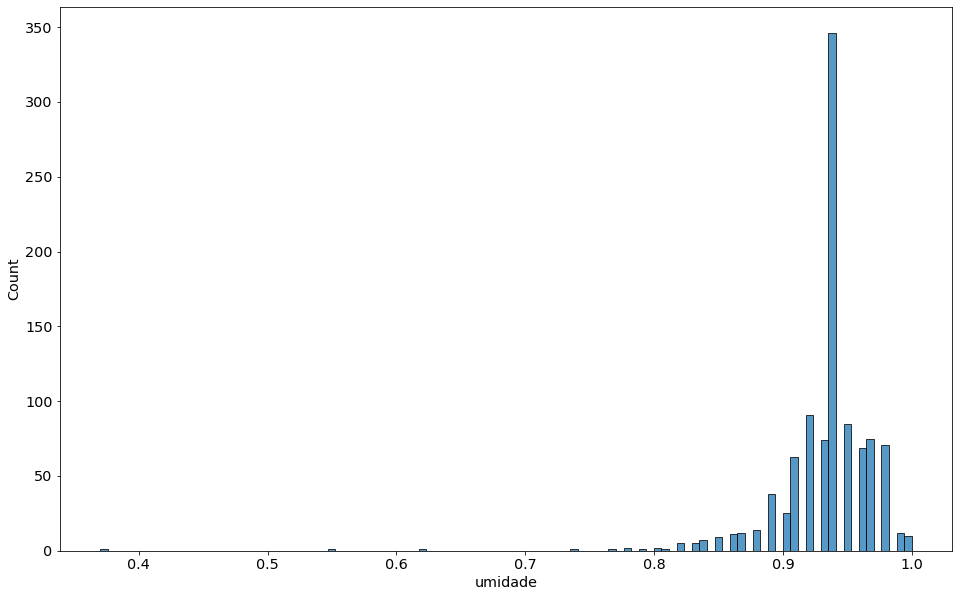

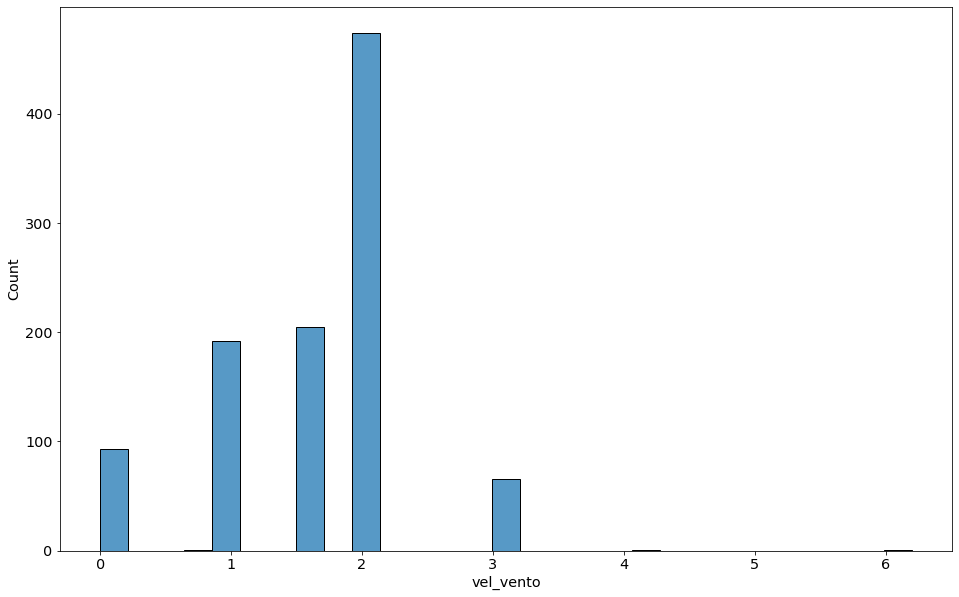

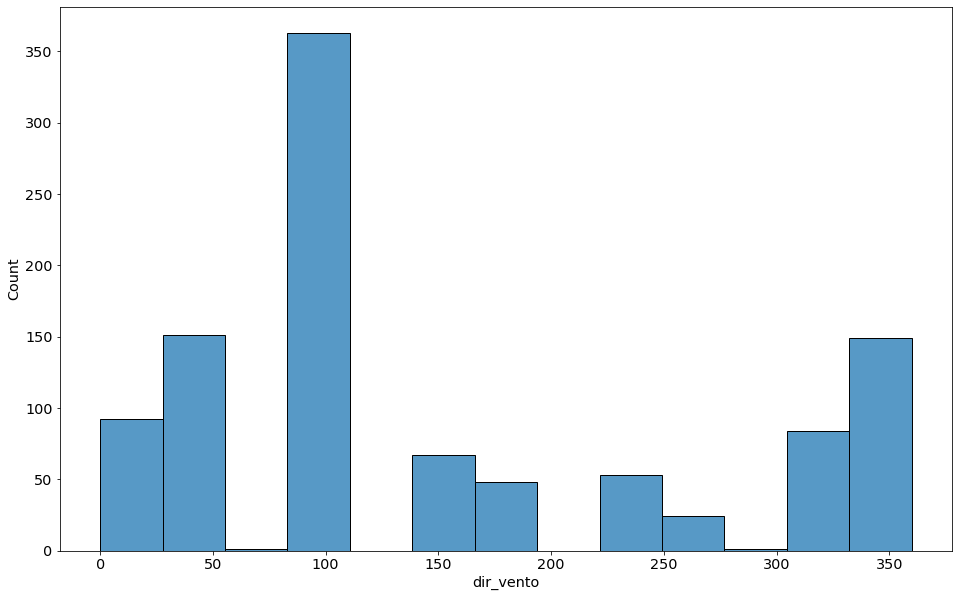

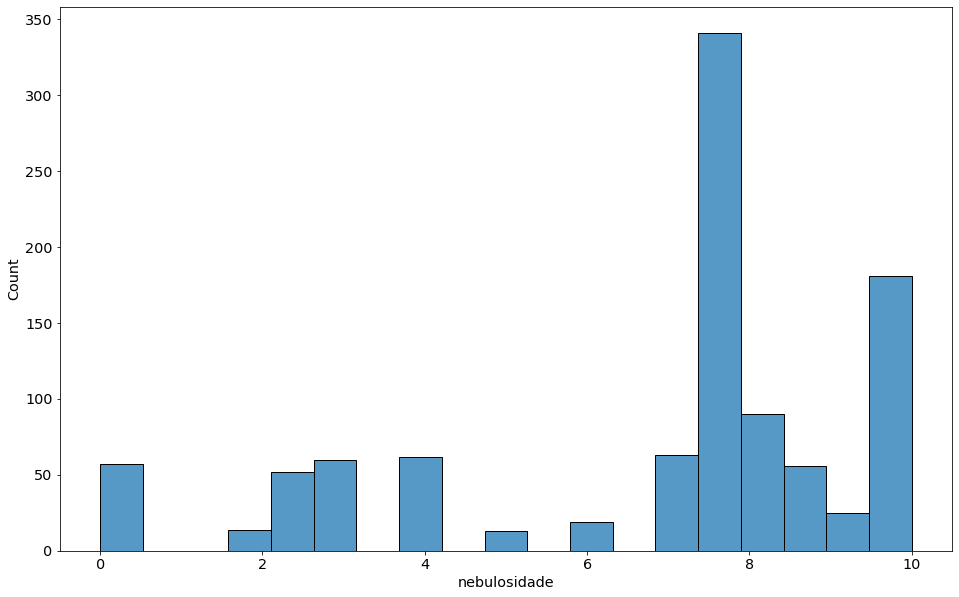

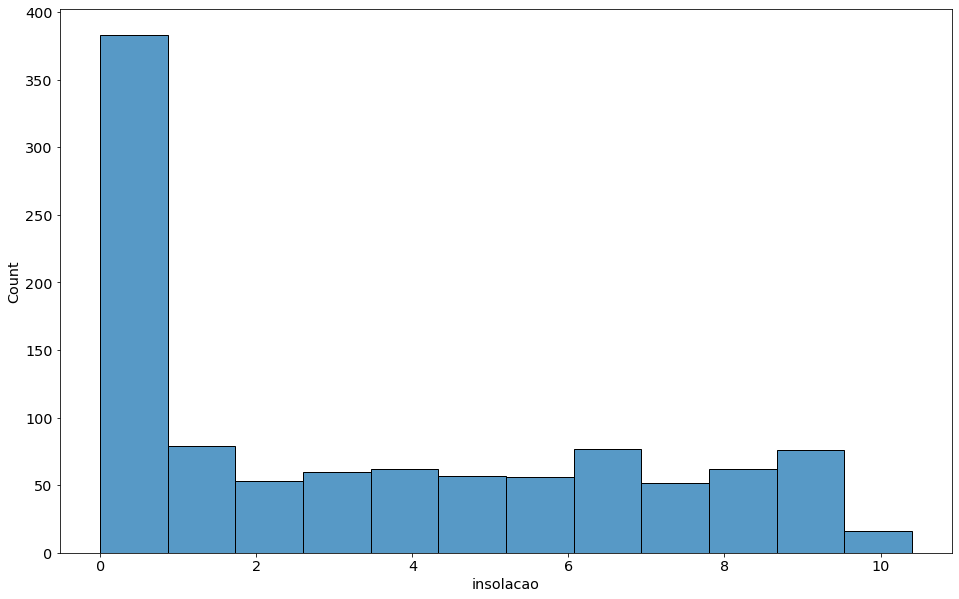

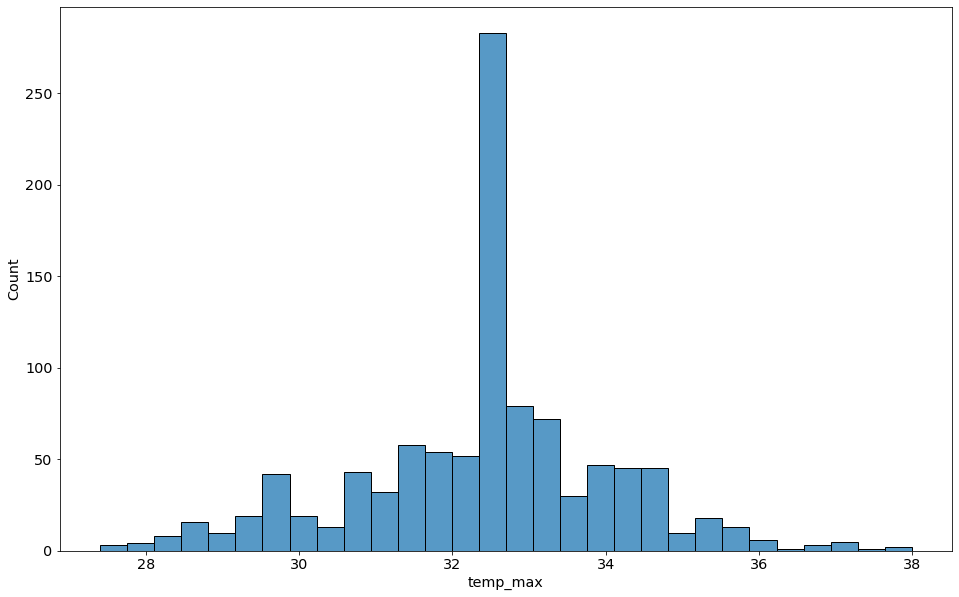

In [ ]:
var_num = df_m.columns[2::]
var_num
for var in var_num:
    sns.histplot(df_m[var])
    plt.show()

# Unindo os dois datasets

In [ ]:
# Une os dois datasets pela coluna Data
df = pd.merge(df_f, df_m, how = 'inner', on = 'Data')
df

,Data,pais,bioma,diasemchuva,precipitacao,riscofogo,frp,temperatura,umidade,vel_vento,dir_vento,nebulosidade,insolacao,temp_max
0,04/12/2021,Brasil,Amazonia,0.0,9.3,0.0,7.0,23.40000,0.99,3.100000,230.0,10.0,6.5,33.400000
1,01/12/2021,Brasil,Amazonia,1.0,0.4,0.0,142.8,26.40000,1.00,2.100000,320.0,10.0,3.4,31.600000
2,02/12/2021,Brasil,Amazonia,0.0,3.3,0.0,8.5,24.20000,0.98,2.100000,230.0,10.0,4.8,31.400000
3,29/11/2021,Brasil,Amazonia,2.0,0.4,0.3,14.0,26.26715,0.94,1.677536,90.0,7.5,7.9,33.800000
4,28/11/2021,Brasil,Amazonia,3.0,3.7,0.1,42.7,25.40000,0.97,3.100000,50.0,10.0,0.0,32.385784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,20/06/2019,Brasil,Amazonia,3.0,0.0,0.5,21.3,27.80000,0.94,2.000000,140.0,7.0,0.0,29.800000
656,15/06/2019,Brasil,Amazonia,0.0,17.4,0.0,12.9,27.00000,0.94,0.000000,0.0,4.0,0.0,32.800000
657,01/04/2019,Brasil,Amazonia,0.0,10.4,0.0,6.7,26.40000,0.93,1.000000,50.0,2.0,10.4,34.000000
658,21/03/2019,Brasil,Amazonia,3.0,0.3,0.0,9.1,27.20000,0.93,2.000000,320.0,8.0,2.8,30.800000


<AxesSubplot:>

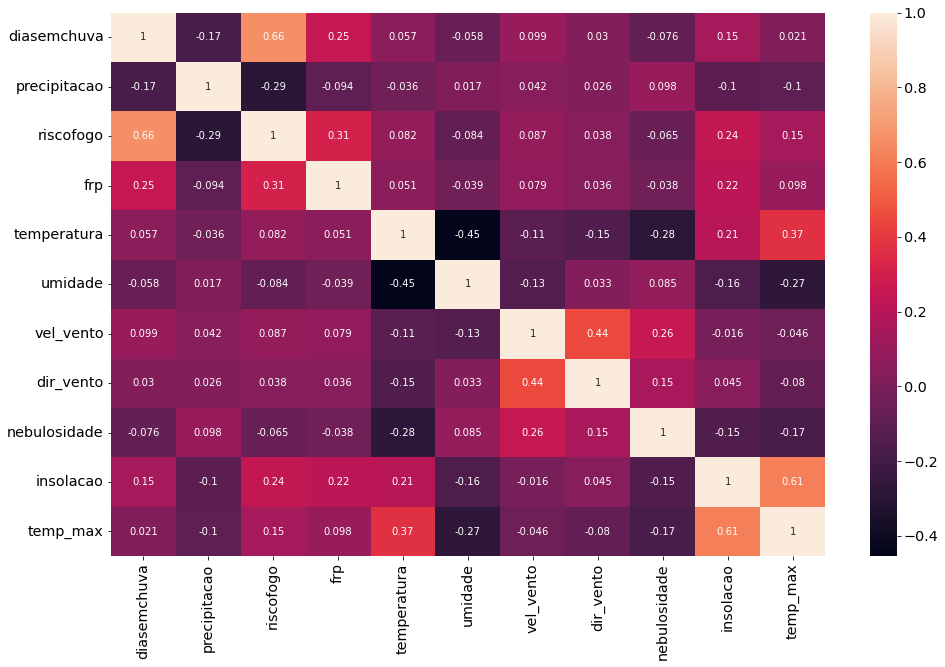

In [ ]:
sns.heatmap(df.corr(), annot=True)